## Books examples first

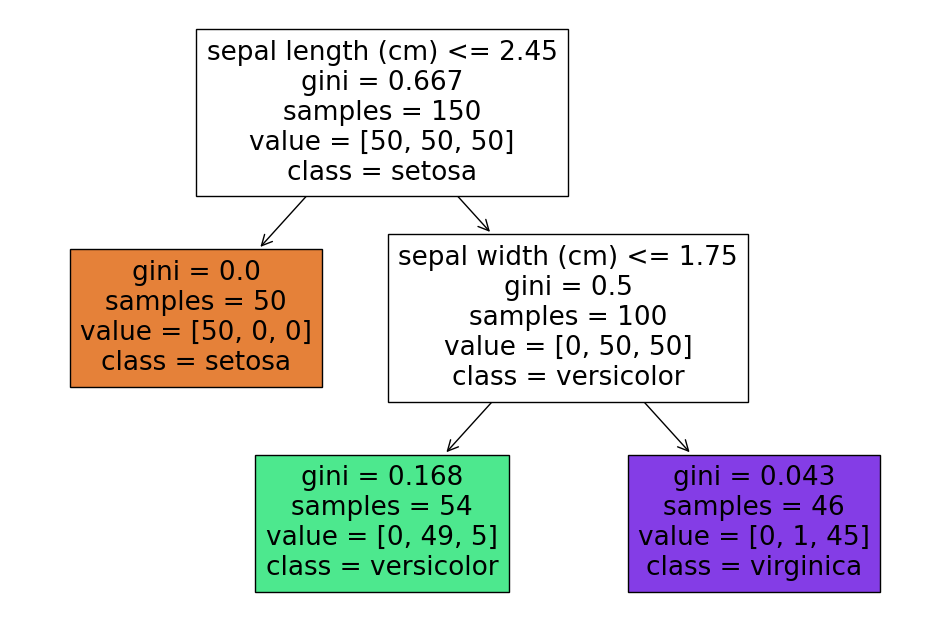

In [94]:
from sklearn.datasets import load_iris, make_moons
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

plt.figure(figsize=(12,8))
plot_tree(tree_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()

In [20]:
tree_clf.predict_proba([[5,1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [24]:
tree_clf.predict([[5,1.5]])

array([1])

## We making moons

In [43]:
moons = make_moons(n_samples=10000, noise = 0.4)

In [45]:
X = moons[0]
y = moons[1]

X_train,  X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [104]:
tree_moons = DecisionTreeClassifier()

params = [{"max_depth": [1,2,3,4,5,6,7,8,9,10], "min_samples_leaf": [2,3,4,5,6,7,8,9], "max_features": [1,2], "min_samples_split": [2,3,4,5,6,7,8,9]}]

tree_grided = GridSearchCV(tree_moons, params, scoring = 'accuracy', cv = 3)

tree_grided.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'max_features': [1, 2],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='accuracy')

In [105]:
# plt.figure(figsize=(12,8))
# plot_tree(tree_grided, filled=True)
# plt.show()

In [106]:
tree_grided.best_estimator_

DecisionTreeClassifier(max_depth=5, max_features=2, min_samples_leaf=3)

In [107]:
cross_val_score(tree_grided, X_train, y_train, cv=3, scoring="accuracy").mean()

0.8489333333333334

In [108]:
y_pred = tree_grided.predict(X_test)

In [109]:
accuracy_score(y_test, y_pred)

0.8512

## Classification on Iris

In [123]:
iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [125]:
iris_tree = DecisionTreeClassifier()

# using same params as above

iris_grid = GridSearchCV(iris_tree, params, scoring="accuracy", cv=3)
iris_grid.fit(X_train, y_train)
iris_grid.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=2, min_samples_leaf=3)

In [129]:
cross_val_score(iris_grid, X_train, y_train, cv=3, scoring="accuracy").mean()

0.9371740161213845

In [131]:
y_pred = iris_grid.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

I dont know if this means i did a good or if this is like over fitted to the balls... i dont think so... 10 depth tho <(O_o)>

## Regression time

In [144]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import numpy as np

In [140]:
np.random.seed(42)
X = np.random.rand(200, 1) * 2 - 1
y = X**3 + np.random.normal(0, 0.05, (200, 1))

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [163]:
tree_reg = DecisionTreeRegressor()

reg_grid = GridSearchCV(tree_reg, params, scoring="neg_mean_squared_error", cv=3)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [156]:
neg_mse = cross_val_score(tree_reg, X_train, y_train, cv=3, scoring="neg_mean_squared_error").mean()
mse = -neg_mse
mse

0.004355424804562247

In [158]:
y_pred = tree_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

0.0035520907986494564

Well this seems fine without even using the hyper param grid boi

In [165]:
reg_grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                          'max_features': [1, 2],
                          'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9]}],
             scoring='neg_mean_squared_error')

In [167]:
reg_grid.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=1, min_samples_leaf=3)

In [172]:
neg_mse = cross_val_score(reg_grid, X_train, y_train, cv=3, scoring="neg_mean_squared_error").mean()
mse = -neg_mse
mse

0.0038996552871006754

In [174]:
y_pred = reg_grid.predict(X_test)

In [176]:
mean_squared_error(y_test, y_pred)

0.0026249959852976484

Alright, hyper param tuning was a little better indeed....